In [2]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

if "/home/coberndorm/Documents/Semestre_IX/Artificial_Intelligence" not in sys.path:
  sys.path.append("/home/coberndorm/Documents/Semestre_IX/Artificial_Intelligence/")

In [3]:
from MLP.activationFunctions import *
import MLP.MLP as MLP
import MLP.MLP_bias as MLP_bias
import MLP.dataManipulation as dm
import MLP.plottingFunctions as pltf

# Data Exploration

### Dataset 1

In [7]:
import scipy.io
mat = scipy.io.loadmat('../data/datos.mat')

data = np.column_stack([mat["COD1"], mat["t"], mat["Xv1"]])
data = dm.normalize_min_max(data)

# X = [X, OD], Y = [S]
train, _, valid, idx = dm.train_test_val(data, (80,0,20))

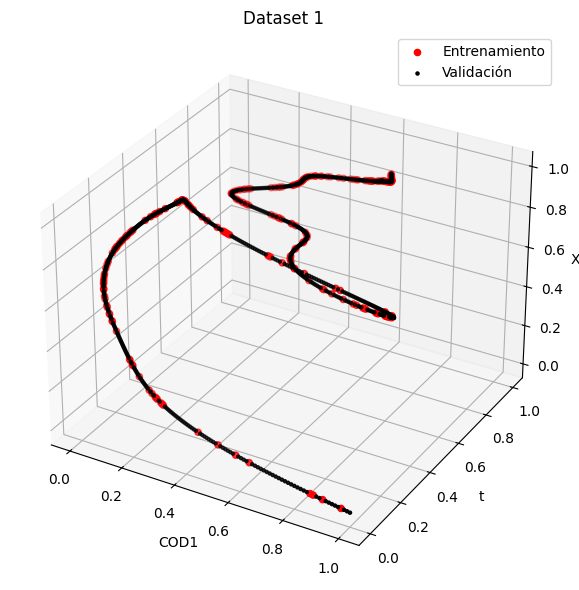

In [8]:
pltf.plot_3d(valid,train, color=['red', 'black'], marker=['o','.'], title="Dataset 1", x_label="COD1", y_label="t", z_label="Xv1", label=["Entrenamiento", "Validación"])

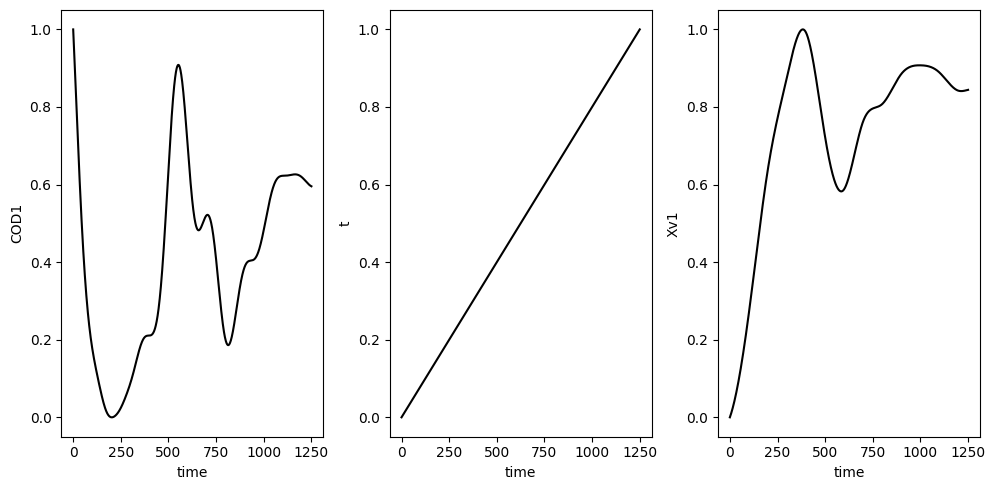

In [9]:
pltf.plot_subdivided_plane_with_data(pd.DataFrame(data,columns=["COD1","t","Xv1"]),  color="black", x_labels=["time"]*3, titles=[None]*3)

### Dataset 2

In [11]:
import scipy.io
mat = scipy.io.loadmat('../data/datosIA.mat')

dataIA = np.column_stack([mat["X"], mat["OD"], mat["S"]])
dataIA = dm.normalize_min_max(dataIA)

# X = [X, OD], Y = [S]
trainIA, _, validIA, idx = dm.train_test_val(dataIA, (80,0,20))


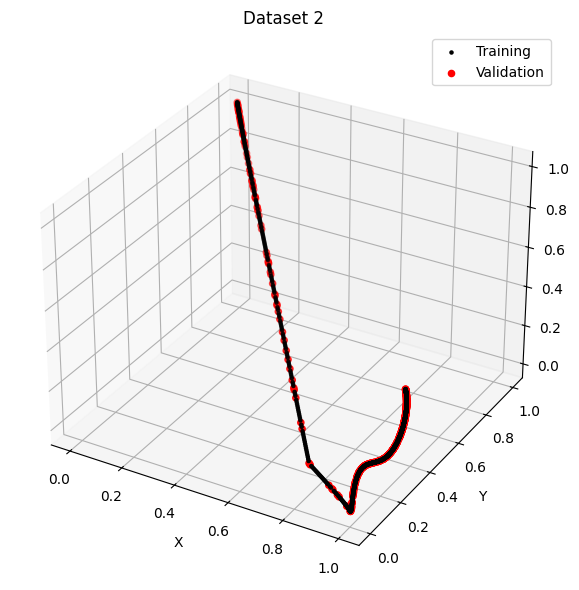

In [12]:
pltf.plot_3d(trainIA, validIA, label=['Training', 'Validation'], marker=['.', 'o'], color=['black', 'red'], title="Dataset 2")

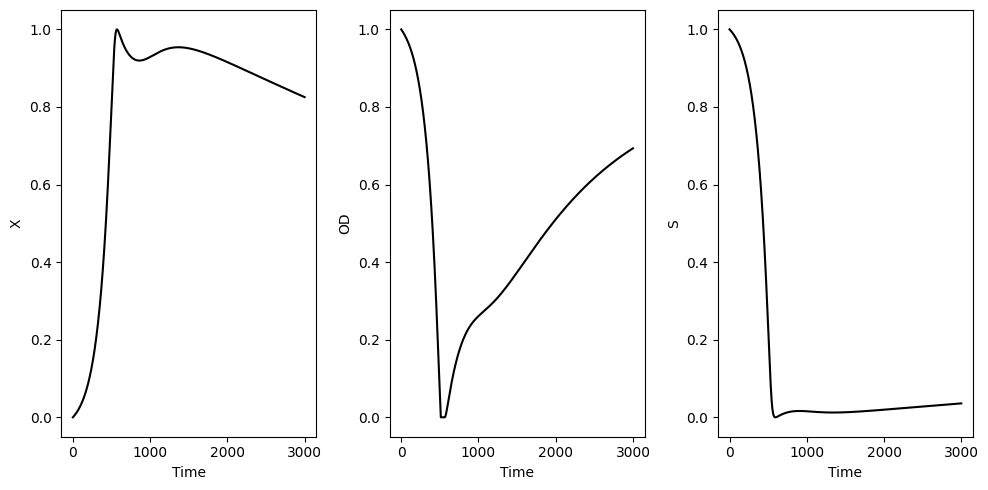

In [13]:
pltf.plot_subdivided_plane_with_data(pd.DataFrame(dataIA,columns=["X","OD","S"]),  color="black", x_labels=["Time"]*3, titles=[None]*3)

# Autoencoder

### Self Programmed Autoencoder

In [9]:
n_neurons = [12]
n_activation = [linear(0.2), tanh(1), linear(0.2)]

NN = MLP_bias.Perceptron(3,n_neurons, 3, n_activation,0.01)
_ = NN.train(train, train, 50, max_error=0.5, min_energy=0.01)

y_pred = np.array([NN.forward(x) for x in valid]).reshape(-1,3)

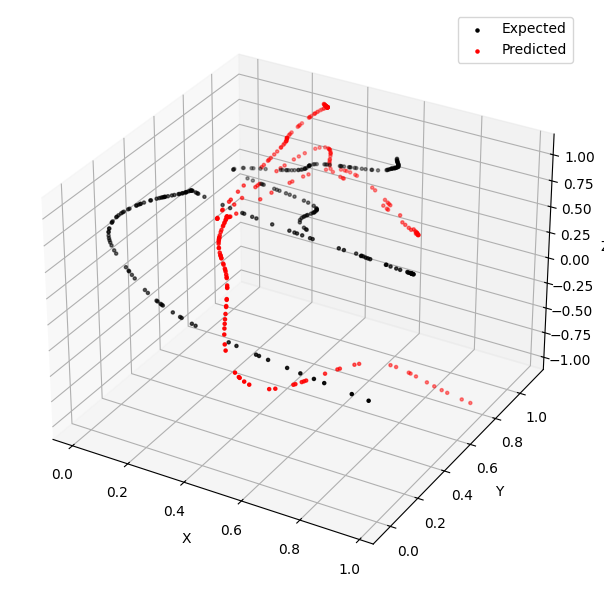

In [10]:
pltf.plot_3d(valid, y_pred, label=["Expected", "Predicted"], color=["black","red"])

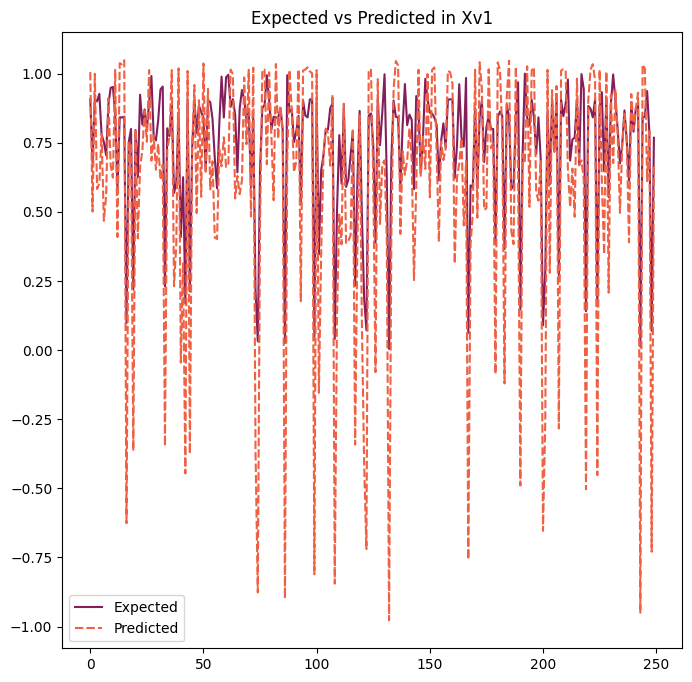

In [11]:
pltf.plot_multiple_graphs(pd.DataFrame({"Expected": valid[:,2], "Predicted": y_pred[:,2]}, columns=["Expected","Predicted"]), title="Expected vs Predicted in Xv1", palette="rocket", dashes = True, figsize=(8,8))

In [38]:
n_neurons = [12]
n_activation = [linear(0.2), tanh(1.2), linear(0.2)]

NN_bias = MLP_bias.Perceptron(3,n_neurons, 3, n_activation,0.01)
_ = NN_bias.train(trainIA, trainIA, 50, max_error=0.2, min_energy=0.01)

y_predIA = np.array([NN_bias.forward(x) for x in validIA]).reshape(-1,3)

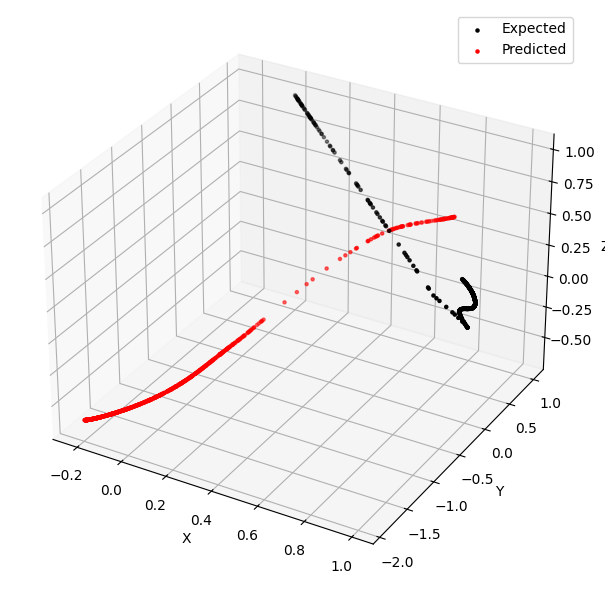

In [39]:
pltf.plot_3d(validIA, y_predIA, label=["Expected", "Predicted"], color=["black","red"])

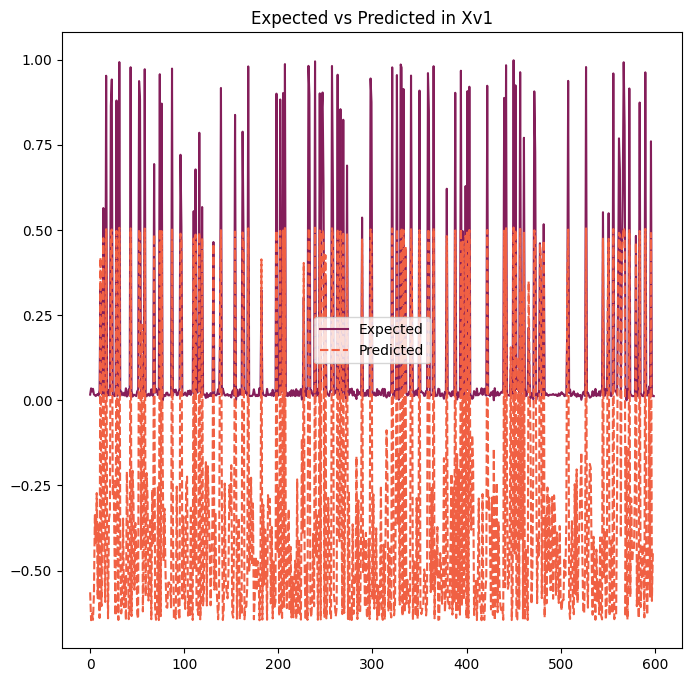

In [40]:
pltf.plot_multiple_graphs(pd.DataFrame({"Expected": validIA[:,2], "Predicted": y_predIA[:,2]}, columns=["Expected","Predicted"]), title="Expected vs Predicted in Xv1", palette="rocket", dashes = True, figsize=(8,8))

### Keras autoencoder

In [ ]:
import keras

class Autoencoder(keras.Model):
    def __init__(self, input_shape=(3,)):
        super(Autoencoder, self).__init__()

        # Encoder
        self.encoder = keras.Sequential([
            keras.layers.Dense(16, activation='relu', input_shape=input_shape),
            keras.layers.Dense(8, activation='relu'),
        ])

        # Decoder
        self.decoder = keras.Sequential([
            keras.layers.Dense(8, activation='relu'),
            keras.layers.Dense(16, activation='relu'),
            keras.layers.Dense(3, activation='linear'),
        ])

    def call(self, inputs):
        encoded = self.encoder(inputs)
        decoded = self.decoder(encoded)
        return decoded

In [ ]:
# Create the autoencoder
autoencoder = Autoencoder()

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder
autoencoder.fit(train, train, epochs=100)
Train_out = autoencoder.predict(train)

# Evaluate the autoencoder
loss= autoencoder.evaluate(valid, valid)
print('Loss:', loss)

Test_out = autoencoder.predict(valid)
#print('Accuracy:', accuracy)

# Preguntar profe esto que putas es?

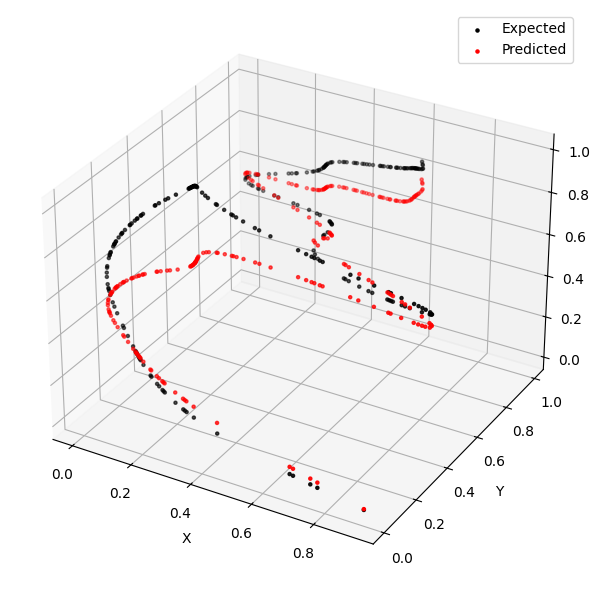

In [ ]:
pltf.plot_3d(valid, np.hstack((valid[:,0].reshape(-1,1),valid[:,1].reshape(-1,1),-y_pred)), label=["Expected", "Predicted"], color=["black","red"])

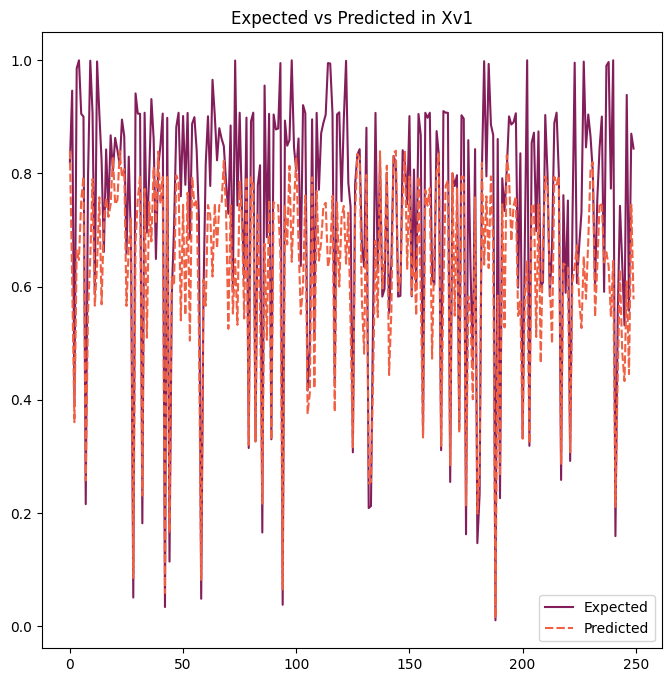

In [ ]:
pltf.plot_multiple_graphs(pd.DataFrame({"Expected": valid[:,-1], "Predicted": -y_pred.reshape(-1)}, columns=["Expected","Predicted"]), title="Expected vs Predicted in Xv1", palette="rocket", dashes = True, figsize=(8,8))